## Mask R-CNN - Inspect Weights of a Trained Model

This notebook includes code and visualizations to test, debug, and evaluate the Mask R-CNN model.

In [1]:
import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import keras

# Root directory of the project
ROOT_DIR = os.path.abspath("../../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "weights", "MobileNet-v1", "GustavZ", "GustavZ_mobile_mask_rcnn_coco.h5")

# assign the GPU for training
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


## Configurations

In [2]:
# Run one of the code blocks

# Shapes toy dataset
# import shapes
# config = shapes.ShapesConfig()

# MS COCO Dataset
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples", "coco"))  # To find local version
import coco 

class InspectConfig(coco.CocoConfig):
    NAME = "inspect"
    
    # GPU
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    
    # data
    IMAGE_MIN_DIM = 800
    IMAGE_MAX_DIM = 1024
    RPN_ANCHOR_SCALES = (32, 64, 128, 256, 512)

#     IMAGE_MIN_DIM = 400
#     IMAGE_MAX_DIM = 512
#     RPN_ANCHOR_SCALES = (16, 32, 64, 128, 256)
    
    # model
    BACKBONE = "mobilenetv1"
    BACKBONE_STRIDES = [4, 8, 16, 32, 64]
    
    # heads
    TOP_DOWN_PYRAMID_SIZE = 256
    FPN_CLASSIF_FC_LAYERS_SIZE = 1024
    
    DETECTION_HEAD = "original"    
#     MASK_HEAD = "original"
    MASK_HEAD = "mobile"
    
    # inference
    DETECTION_MIN_CONFIDENCE = 0
    
    TRAIN_BN = False

config = InspectConfig()
config.display()


Configurations:
BACKBONE                       mobilenetv1
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_HEAD                 original
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_HEAD    

## Notebook Preferences

In [3]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

In [4]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Load Model

In [5]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights
print("Loading weights ", COCO_MODEL_PATH)
model.load_weights(COCO_MODEL_PATH, by_name=True)

Loading weights  /home/processyuan/code/HumanMask/my-Mobile-Mask-RCNN/weights/MobileNet-v1/GustavZ/GustavZ_mobile_mask_rcnn_coco.h5


## Review Weight Stats

In [6]:
# Show stats of all trainable weights    
visualize.display_weight_stats(model)

WEIGHT NAME,SHAPE,MIN,MAX,STD
conv0/kernel:0,"(3, 3, 3, 32)",-0.2610,+0.2030,+0.0848
conv0_bn/gamma:0,"(32,)",+0.9706,+1.0007,+0.0062
conv0_bn/beta:0,"(32,)",-0.0804,+0.2459,+0.0542
conv0_bn/moving_mean:0,"(32,)",-0.2860,+0.3263,+0.1709
conv0_bn/moving_variance:0,"(32,)",+0.0021,+0.3052,+0.0742
conv_dw_1/depthwise_kernel:0,"(3, 3, 32, 1)",-30.6031,+23.9911,+4.7436
conv_dw_1_bn/gamma:0,"(32,)",+0.0273,+3.6135,+1.1026
conv_dw_1_bn/beta:0,"(32,)",-1.2170,+5.1339,+1.7800
conv_dw_1_bn/moving_mean:0,"(32,)",-3.5146,+10.4625,+2.5612
conv_dw_1_bn/moving_variance:0,"(32,)",+0.1275,+372.3493,+71.4591


# Histograms of Weights

TODO: cleanup this part

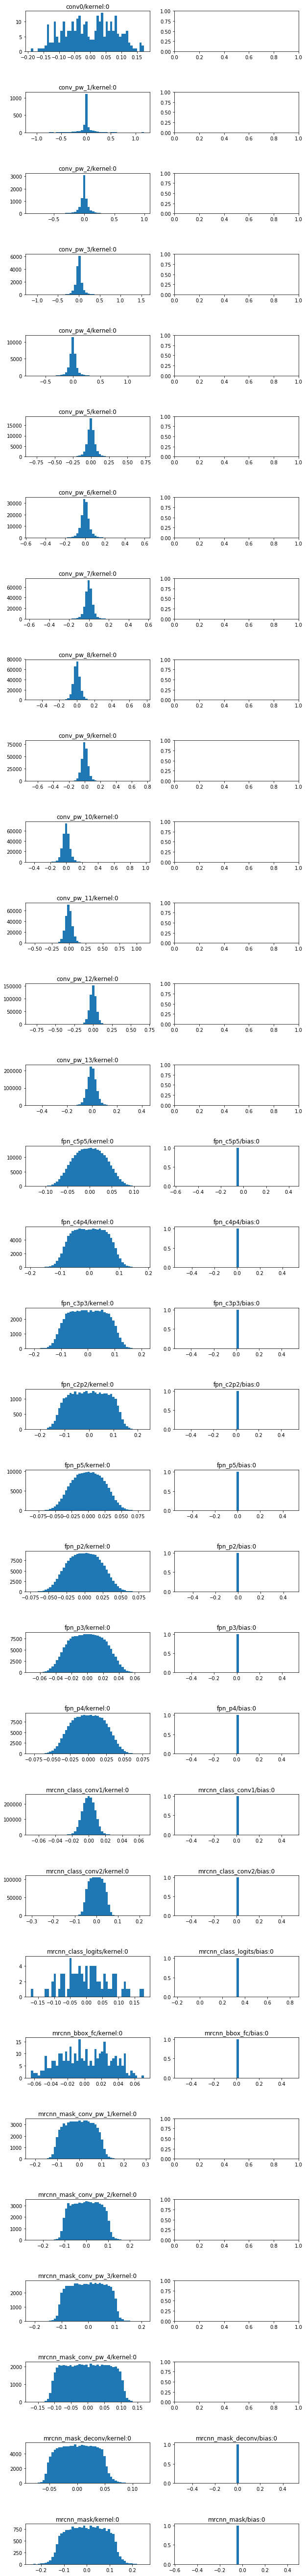

In [7]:
# Pick layer types to display
LAYER_TYPES = ['Conv2D', 'Dense', 'Conv2DTranspose']
# Get layers
layers = model.get_trainable_layers()
layers = list(filter(lambda l: l.__class__.__name__ in LAYER_TYPES, 
                layers))
# Display Histograms
fig, ax = plt.subplots(len(layers), 2, figsize=(10, 3*len(layers)),
                       gridspec_kw={"hspace":1})
for l, layer in enumerate(layers):
    weights = layer.get_weights()
    for w, weight in enumerate(weights):
        tensor = layer.weights[w]
        ax[l, w].set_title(tensor.name)
        _ = ax[l, w].hist(weight[w].flatten(), 50)
